In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
from six import iteritems
import shelve
from scipy.ndimage.measurements import label
import h5py
import json
import sys 
import operator 
from scipy import ndimage

from pdb import set_trace as st
import copy
import os
from IPython.display import Image, display
from IPython.html.widgets import interact, fixed
from IPython.html import widgets
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import os
from os.path import expanduser
import time

import torchvision
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, ConcatDataset
from torch.nn.parallel import data_parallel
from torchvision import transforms

import random
import six

import importlib

import artificery
import metroem
importlib.reload(metroem)
import torchfields

from metroem import loss
from metroem import masks
from metroem import alignment
from metroem import aligner
from metroem import train
from metroem import helpers
from metroem import dataset

importlib.reload(helpers)
importlib.reload(aligner)
importlib.reload(alignment)
importlib.reload(masks)
importlib.reload(loss)
importlib.reload(train)
importlib.reload(dataset)

from metroem.alignment import align_sample
from metroem.loss import similarity_score, smoothness_penalty, get_dataset_loss, get_mse_and_smoothness_masks, smoothness_score
from metroem.helpers import reverse_dim, downsample

def visualize_residuals(res, figsize=(10,10), x_coords=None, y_coords=None, vec_grid=50):
    res = prepare_for_show(res)
    if res.shape[0] == 2:
        res = np.transpose(res, (1, 2, 0))

    assert res.shape[0] == res.shape[1]
    plt.figure(figsize=figsize)
    n = res.shape[0]
    y, x = np.mgrid[0:n, 0:n]
    
    if x_coords is None:
        x_coords = [0, res.shape[0]]
    if y_coords is None:
        y_coords = [0, res.shape[1]]
    
    ex = (1) * res[:, :, 0]
    ey = res[:, :, 1]
    r = np.arctan2(ex, ey)
    
    interval = (x_coords[1] - x_coords[0]) // vec_grid
    
    plt.quiver(  x[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval],  
                 y[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval],
                ex[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval], 
                ey[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval], 
                 r[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval], alpha=0.6)
    plt.quiver(x[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval],  
                 y[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval],
                ex[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval], 
                ey[x_coords[0]:x_coords[1]:interval, y_coords[0]:y_coords[1]:interval], edgecolor='k', facecolor='None', linewidth=.5)
    plt.gca().invert_yaxis()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#checkpiont = "spynet_x0"
#checkpoint_folder = "/usr/people/popovych/metro_models/spynet_m4m6m9/0_mip4in_mip4569module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

#checkpiont = "rigid_net"
checkpiont = "starge3_base"
#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m4m6m9/0_mip7in_mip9module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

checkpoint_folder = "/usr/people/popovych/metro_models/pure_emb_x0/0_mip7in_purity/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m4m6m9/2_mip4in_mip4module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)
#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m5m9/1_mip4in_mip5module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

test_pyramid = aligner.Aligner(checkpoint_folder, checkpoint_name=checkpiont, train=False, 
                               finetune_lr=3e-1, finetune_sm=200e0, finetune_iter=200, finetune=False)
viz1 = PyramidVisualizer(test_pyramid)
run_mip = 0

viz1.def_norm_img = True
viz1.set_model(test_pyramid)

/usr/people/popovych/metro_models/pure_emb_x0/0_mip7in_purity/model/model_spec.json
average_pool.json
embedder_fms1to1.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
embedder_fms2to3.json
block_3convs_3x3_fms2to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
upsample_residuals.json
identity.json
creating new checkpiont...
Adding 'x10240_y0_z200' dataset.
Loading file '/usr/people/popovych/metro_datasets/fly_full_x4_bigtest/x10240_y0_z200_MIP7.

In [3]:
#checkpiont = "spynet_x0"
#checkpoint_folder = "/usr/people/popovych/metro_models/spynet_m4m6m9/0_mip4in_mip4569module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

#checkpiont = "rigid_net"
checkpiont = "stage3_x1"
#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m4m6m9/0_mip7in_mip9module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

checkpoint_folder = "/usr/people/popovych/metro_models/pure_emb_x0/0_mip7in_purity/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m4m6m9/2_mip4in_mip4module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)
#checkpoint_folder = "/usr/people/popovych/metro_models/pyramid_m5m9/1_mip4in_mip5module/model" #"/usr/people/popovych/aligner/experiments/{}".format(pyramid_name)

test_pyramid = aligner.Aligner(checkpoint_folder, checkpoint_name=checkpiont, train=False, 
                               finetune_lr=3e-1, finetune_sm=200e0, finetune_iter=200, finetune=False)
viz1 = PyramidVisualizer(test_pyramid)
run_mip = 0

viz1.def_norm_img = True
viz1.set_model(test_pyramid)
viz1.visualize(section_count=1, default_slice=3000, default_x=0, default_y=0)


/usr/people/popovych/metro_models/pure_emb_x0/0_mip7in_purity/model/model_spec.json
average_pool.json
embedder_fms1to1.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
embedder_fms2to3.json
block_3convs_3x3_fms2to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
upsample_residuals.json
identity.json
Adding 'x10240_y0_z200' dataset.
Loading file '/usr/people/popovych/metro_datasets/fly_full_x4_bigtest/x10240_y0_z200_MIP7.h5...'


interactive(children=(Checkbox(value=False, description='Take from validation set'), Checkbox(value=True, desc…

In [4]:
import modelhouse
stage = 3
checkpoint_name = f"stage{stage}_x0_lowmin_win4"
embedder = modelhouse.loading.uncached_load_model_str(
    #'/usr/people/popovych/metro_models/pure_emb_x1_lite/0_mip7in_purity', 
    '/usr/people/popovych/metro_models/pure_emb_x0/0_mip7in_purity', 
     params=json.dumps({
        "checkpoint_name": checkpoint_name,
        "finetune": False
})).cuda()


/usr/people/popovych/.modelhouse/tmp_files/tmpicsmsz4_/model/model_spec.json
average_pool.json
embedder_fms1to1.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
block_3convs_3x3_fms1to32to1.json
average_pool.json
embedder_fms2to3.json
block_3convs_3x3_fms2to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
identity.json
upsample_residuals.json
identity.json


In [6]:

n = random.choice(range(2000, 4000))
n = 3227
print (f"SAMPLE {n}")
sample = viz1.dataset[n]

src = torch.tensor(sample['src'], device='cuda').unsqueeze(0)
tgt = torch.tensor(sample['tgt'], device='cuda').unsqueeze(0)

src_emb = embedder.aligner.get_embeddings(src, level=stage, preserve_zeros=True)
tgt_emb = embedder.aligner.get_embeddings(tgt, level=stage, preserve_zeros=True)

src_downs = src.clone()
while src_downs.shape[-1] > tgt_emb.shape[-1]:
    src_downs = torch.nn.functional.avg_pool2d(src_downs, 2)

SAMPLE 3227


/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [7]:
src_emb[0][src_emb[0] != 0].mean()

tensor(-0.0055, device='cuda:0')

In [8]:
v = [src_emb[0], src_downs, src]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2), value=0), IntText(value=1, descri…

In [9]:
v = [src_emb[0], tgt_emb[0], src, tgt, 
     metroem.finetuner.get_nailed_region(src_emb[0], tgt_emb[0], sensitivity=0.5)]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2, 3, 4), value=0), IntText(value=1, …

In [84]:
torch.save(encoder.state_dict(), '/usr/people/popovych/metro_models/rubber_emb_x1/enc/good_x1.state.pth.tar')
torch.save(decoder.state_dict(), '/usr/people/popovych/metro_models/rubber_emb_x1/dec/good_x1.state.pth.tar')

In [5]:
import modelhouse
checkpoint = 'good_x1'

encoder = modelhouse.loading.uncached_load_model_str(
    #'/usr/people/popovych/metro_models/pure_emb_x1_lite/0_mip7in_purity', 
    '/usr/people/popovych/metro_models/rubber_emb_x1/enc', 
     params=json.dumps({
        "checkpoint_name": checkpoint,
     })
).cuda().train()


/usr/people/popovych/.modelhouse/tmp_files/tmpedf43zee/model/model_spec.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json


In [6]:
decoder = modelhouse.loading.uncached_load_model_str(
    #'/usr/people/popovych/metro_models/pure_emb_x1_lite/0_mip7in_purity', 
    '/usr/people/popovych/metro_models/rubber_emb_x1/dec', 
     params=json.dumps({
        "checkpoint_name": checkpoint,
     })
).cuda().train()


/usr/people/popovych/.modelhouse/tmp_files/tmpmqq67y5o/model/model_spec.json
block_3convs_3x3_fms3to32to32.json
upconv.json
block_3convs_3x3_fms32to32to32.json
upconv.json
block_3convs_3x3_fms32to32to3.json


In [8]:
encoder.load_state_dict(torch.load(f'/usr/people/popovych/metro_models/rubber_emb_x1/enc/{checkpoint}.state.pth.tar'))
decoder.load_state_dict(torch.load(f'/usr/people/popovych/metro_models/rubber_emb_x1/dec/{checkpoint}.state.pth.tar'))

<All keys matched successfully>

In [9]:
enc = encoder(src_emb.unsqueeze(0))[0]
dec = decoder(enc.unsqueeze(0))[0]

NameError: name 'src_emb' is not defined

In [81]:
v = [src_emb[0], enc[0], dec[0]]
#simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

In [10]:
import kornia
def make_random_field(seed_dim=12, size=512, magn=30, coarsening=4):
    field_seed = torch.normal(0, magn/3, size=(2, seed_dim, seed_dim)).unsqueeze(0)
    for _ in range(coarsening):
        field_seed = kornia.gaussian_blur2d(field_seed, (3, 3), (10.5, 10.5))
    field = torch.nn.functional.upsample(field_seed, size=[size, size], mode='bicubic')
    return field.field().cuda()

res = make_random_field(
    size=src_emb[0].shape[-1],
    magn=src_emb[0].shape[-1]/10,
    coarsening=3
)

NameError: name 'src_emb' is not defined

In [32]:
from tqdm.notebook import tqdm


trainable = []
lr = 3e-5
trainable.extend(encoder.parameters())
trainable.extend(decoder.parameters())
optimizer = torch.optim.Adam(trainable, lr=lr, weight_decay=0)

In [30]:
dataset = []
for n in tqdm(range(0, 2200)):
    #n = random.choice(range(0, 5000))
    n *= 2
    sample = viz1.dataset[n]

    img = torch.tensor(sample['src'], device='cuda').unsqueeze(0)
    emb = embedder.aligner.get_embeddings(img, level=stage, preserve_zeros=True).unsqueeze(0)
    dataset.append(emb)

  0%|          | 0/2200 [00:00<?, ?it/s]

/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [39]:
seed_dim = random.choice(range(2, 16))
coarsening = random.choice(range(1, 5))
magn = src_emb[0].shape[-1] / random.choice(range(10, 30))
res = make_random_field(
    seed_dim=seed_dim,
    size=src_emb[0].shape[-1],
    magn=magn,
    coarsening=coarsening
).from_pixels()

alpha = 0.01#1e-6
running_loss = []
for e in tqdm(list(range(10000000))):
    if e % 25 == 0:
        seed_dim = random.choice(range(2, 16))
        coarsening = random.choice(range(1, 5))
        magn = src_emb[0].shape[-1] / random.choice(range(10, 50)) + 10
        res = make_random_field(
            seed_dim=seed_dim,
            size=src_emb[0].shape[-1],
            magn=magn,
            coarsening=coarsening
        ).from_pixels()
    #n = random.choice(range(0, 5000))
    #print (f"SAMPLE {n}")
    emb = random.choice(dataset)
    #emb = dataset[-1]
    enc = encoder(emb)
    
    enc_mask = ((emb != 0))
    while enc_mask.shape[-1] > enc.shape[-1]:
        enc_mask = torch.nn.functional.avg_pool2d(enc_mask.float(), 2) > 0.7
    enc[enc_mask == 0] = 0 
    enc_norm = metroem.helpers.normalize(enc, mask=enc!=0)
    enc = enc_norm
    
    emb_warp = res(emb)
    res_enc = res.clone()
    while res_enc.shape[-1] > enc.shape[-1]:
        res_enc = res_enc.down()
        
    enc_warp = res_enc(enc)
    enc_wrap_mask = ((emb_warp != 0))
    while enc_wrap_mask.shape[-1] > enc.shape[-1]:
        enc_wrap_mask = torch.nn.functional.avg_pool2d(enc_wrap_mask.float(), 2) > 0.7
    enc_warp[enc_wrap_mask == 0] = 0
    
    dec_warp = decoder(enc_warp)

    recon_loss = (dec_warp - emb_warp)[emb_warp != 0].abs().sum()
    
    
    #enc_warp_norm = metroem.helpers.normalize(enc_warp, mask=enc_warp!=0)
    diff = (enc - enc_warp).abs()

    th = np.median(metroem.helpers.get_np(diff[(enc != 0) * (enc_warp != 0)].flatten()))
    
    metr_loss = diff[(diff < th) * (diff != 0)].sum()
    #import pdb; pdb.set_trace()
    loss = recon_loss - alpha * metr_loss
    if loss == loss:
        running_loss.append(loss.item())
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if e % 2000 == 0 and e != 0:
        print (sum(running_loss) / len(running_loss))
        running_loss = []
        #break

  0%|          | 0/10000000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [40]:
enc_norm = metroem.helpers.normalize(enc, mask=enc!=0)
enc_warp_norm = metroem.helpers.normalize(enc_warp, mask=enc_warp!=0)
diff = (enc_norm - enc_warp_norm).abs()
diff[enc_norm == 0] = 0
diff[enc == 0] = 0

#th = np.median(metroem.helpers.get_np(diff[diff != 0].flatten()))
print (th)
v = [enc_norm[0, 0], enc_warp_norm[0, 0], diff[0, 0], diff[0, 0] < th]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

0.08450267


interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2, 3), value=0), IntText(value=1, des…

In [32]:
enc_warp.min()

tensor(-227.5014, device='cuda:0', grad_fn=<MinBackward1>)

In [43]:
'''emb = random.choice(dataset)
enc = encoder(emb)

emb_warp = res(emb)
enc_warp = res.down()(enc)
dec_warp = decoder(enc_warp)'''

i = 0
v = [emb[0, 0], emb_warp[0, 0], enc_warp[0, 0], dec_warp[0, 0],
     metroem.helpers.normalize(enc_warp, mask=enc_warp!=0)[0, 0],
     metroem.helpers.normalize(enc, mask=enc!=0)[0, 0]]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2, 3, 4, 5), value=0), IntText(value=…

In [17]:
src_enc.shape, src_emb.shape

(torch.Size([1, 3, 56, 56]), torch.Size([1, 3, 224, 224]))

In [11]:

n = random.choice(range(0, 4000))
#n = 3227
print (f"SAMPLE {n}")
sample = viz1.dataset[n]

src = torch.tensor(sample['src'], device='cuda').unsqueeze(0).unsqueeze(0)
tgt = torch.tensor(sample['tgt'], device='cuda').unsqueeze(0).unsqueeze(0)

src_emb = embedder.aligner.get_embeddings(src, level=stage, preserve_zeros=True).unsqueeze(0)
tgt_emb = embedder.aligner.get_embeddings(tgt, level=stage, preserve_zeros=True).unsqueeze(0)

src_mask = ((src_emb != 0))
while src_mask.shape[-1] > src_enc.shape[-1]:
    src_mask = torch.nn.functional.avg_pool2d(src_mask.float(), 2) > 0.7
src_enc = encoder(src_emb)
src_enc = metroem.helpers.normalize(src_enc, mask=src_mask)
src_dec = decoder(src_enc)

tgt_mask = ((tgt_emb != 0))
while tgt_mask.shape[-1] > src_enc.shape[-1]:
    tgt_mask = torch.nn.functional.avg_pool2d(tgt_mask.float(), 2) > 0.7
tgt_enc = encoder(tgt_emb)
tgt_enc = metroem.helpers.normalize(tgt_enc, mask=tgt_mask)
tgt_dec = decoder(tgt_enc)

n = 1
v = [src_emb[0, 0], tgt_emb[0, 0], src_enc[0, n], tgt_enc[0, n], src_dec[0, 0], tgt_dec[0, 0]]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

SAMPLE 179


/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


NameError: name 'src_enc' is not defined

In [32]:
v = [src_emb[0], res.from_pixels()(src_emb[0])]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

NameError: name 'res' is not defined

In [188]:
%load_ext autoreload
%autoreload 2

import modelhouse
import metroem

from metroem import finetuner
from metroem import masks
importlib.reload(finetuner)
importlib.reload(masks)
from metroem.finetuner import optimize_pre_post_ups

def opt(src, tgt, pred_res_start, src_defects=None, tgt_defects=None, lr=18e-1, sm=2e1, num_iter=100):
    mse_keys_to_apply = {
        'src': [
            {'name': 'src',
             'fm': 0,
             "coarsen_ranges": [ (0, 0)],
             'binarization': {'strat': 'neq', 'value': 10},
             }
            ],   

    }
    sm_keys_to_apply = {  
                                                                                       
    }
    
    src_small_defects = None
    src_large_defects = None
    
        
    if src_small_defects is not None:
        src_small_defects = src_small_defects.squeeze(0)
    else:
        src_small_defects = torch.zeros_like(src)
        
    if src_large_defects is not None:
        src_large_defects = src_large_defects.squeeze(0)
    else:
        src_large_defects = torch.zeros((src.shape[-1], src.shape[-1]))
    
    pred_res_opt = optimize_pre_post_ups(src, tgt, pred_res_start,
            src_defects=torch.zeros_like(src_defects),
            tgt_defects=torch.zeros_like(tgt_defects),
            crop=1, num_iter=num_iter,
            opt_res_coarsness=0,
            sm_keys_to_apply=sm_keys_to_apply,
            mse_keys_to_apply=mse_keys_to_apply,
            normalize=True,
            nailed_check_period=100,
            mask_around_nailed=False,
            verbose=True,
            sm=sm, lr=lr)
    
    return pred_res_opt

class OptiPrecoarse(torch.nn.Module):
    def __init__(self, embedder_path=None, 
                 embedder_params={
                    "checkpoint_name": "stage3_x0",
                    "finetune": False
                },
                 device='cuda',
                 level=-1,
                 sm=2e1,
                 mask_value=-1,
                 num_iter=1000,
                 lr=18e-1
                ):
        super().__init__()
        if embedder_path is not None:
            self.embedder = modelhouse.load_model(embedder_path, params=json.dumps(embedder_params)).to(device)
        else:
            self.embedder = None
        self.device = device
        self.level = level
        self.sm = sm
        self.mask_value = mask_value
        self.lr = lr
        self.num_iter = num_iter
        
    def forward(self, src_img, tgt_img, src_agg_field=None):
        #self.embedder(src_img=src_img, tgt_img=tgt_img)
        if self.embedder is not None:
            src_emb = self.embedder.aligner.get_embeddings(src_img, level=self.level, preserve_zeros=True)
            tgt_emb = self.embedder.aligner.get_embeddings(tgt_img, level=self.level, preserve_zeros=True)
        else:
            src_emb = src_img
            tgt_emb = tgt_img
        
        padded = False
        if src_emb.shape[-1] < 256:
            padded = True
            src_emb = torch.nn.functional.pad(src_emb, [8, 8, 8, 8])
            tgt_emb = torch.nn.functional.pad(tgt_emb, [8, 8, 8, 8])
            if src_agg_field is not None:
                src_agg_field = torch.nn.functional.pad(src_agg_field, [8, 8, 8, 8])
        src_mask = src_emb[0] == 0
        tgt_mask = tgt_emb[0] == 0
        src_emb[:, src_mask] = self.mask_value
        tgt_emb[:, tgt_mask] = self.mask_value
        
        if src_agg_field is None:
            res_start = torch.zeros([1, 2, tgt_emb.shape[-1], src_emb.shape[-1]]).to(self.device)
        else:
            res_start = src_agg_field
            res_start = res_start.from_pixels()
            while res_start.shape[-1] < src_emb.shape[-1]:
                res_start = res_start.up()
            res_start = res_start.pixels()
            
        pred_res_opt = 0
        pred_res_opt = opt(
            src_emb.unsqueeze(0), 
            tgt_emb.unsqueeze(0), 
            res_start, 
            src_defects=torch.zeros_like(src_mask, device=self.device), 
            tgt_defects=torch.zeros_like(src_mask, device=self.device), 
            lr=self.lr,
            sm=self.sm,
            num_iter=self.num_iter
        )
        
        if padded:
            padded = True
            src_emb = torch.nn.functional.pad(src_emb, [-8, -8, -8, -8])
            tgt_emb = torch.nn.functional.pad(tgt_emb, [-8, -8, -8, -8])
            pred_res_opt = torch.nn.functional.pad(pred_res_opt, [-8, -8, -8, -8]).field()
        
        return src_emb, tgt_emb, pred_res_opt, src_mask




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
from tqdm.notebook import tqdm

stage = 3
opt_pc_m10 = OptiPrecoarse(
    mask_value=0,#,-src_emb.max()*5, 
    level=stage,
    sm=30,
    lr=3e-1,
    num_iter=2000,
)

n = random.choice(range(1000, 4500))

# big rot
#n = 3227
n = 3272
#n = 3242
# missing:
#n= 2636
#n=2627
# small rot:
#n = 2927
print (f"SAMPLE {n}")
#n = random.choice(range(5000))
sample = viz1.dataset[n]
src_img = torch.tensor(sample['src'], device='cuda').unsqueeze(0)
tgt_img = torch.tensor(sample['tgt'], device='cuda').unsqueeze(0)
print (f"SAMPLE {n}")
sample = viz1.dataset[n]

src = torch.tensor(sample['src'], device='cuda').unsqueeze(0).unsqueeze(0)
tgt = torch.tensor(sample['tgt'], device='cuda').unsqueeze(0).unsqueeze(0)

src_emb = embedder.aligner.get_embeddings(src, level=stage, preserve_zeros=True).unsqueeze(0)
tgt_emb = embedder.aligner.get_embeddings(tgt, level=stage, preserve_zeros=True).unsqueeze(0)

src_enc = encoder(src_emb)

src_mask = ((src_emb != 0))
while src_mask.shape[-1] > src_enc.shape[-1]:
    src_mask = torch.nn.functional.avg_pool2d(src_mask.float(), 2) > 0.7
src_enc = metroem.helpers.normalize(src_enc, mask=src_mask, mask_fill=0)
src_dec = decoder(src_enc)

tgt_mask = ((tgt_emb != 0))
while tgt_mask.shape[-1] > src_enc.shape[-1]:
    tgt_mask = torch.nn.functional.avg_pool2d(tgt_mask.float(), 2) > 0.7
tgt_enc = encoder(tgt_emb)
tgt_enc = metroem.helpers.normalize(tgt_enc, mask=tgt_mask, mask_fill=0)
tgt_dec = decoder(tgt_enc)

src = src_enc
#src_mask = torch.nn.functional.avg_pool2d((src_emb == 0).float(), 2) > 0.5
#src[src_mask] = 0
tgt = tgt_enc
#tgt_mask = torch.nn.functional.avg_pool2d((tgt_emb == 0).float(), 2) > 0.5
#tgt[tgt_mask] = 0

src = src_enc[0].clone().detach()
tgt = tgt_enc[0].clone().detach()
_, _, res, src_mask = opt_pc_m10.forward(src_img=src, tgt_img=tgt)


pred_tgt = res.from_pixels()(src_enc)


SAMPLE 3272
SAMPLE 3272


/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/people/popovych/env/corgie_merge/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: To copy construct from a tensor

0.057096977 0.057096977 0.0
Nailed : 642/650 px
Nailed : 642/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
Nailed : 646/650 px
SLOW NAILING
New best: 1317, No impr: 15, NaN: 0, Iter: 1799
0.024389636 0.018882973 0.005506663
46.20693826675415


In [210]:
n = 1
v = [src_enc[0, n], tgt_enc[0, n], pred_tgt[0, n]]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2), value=0), IntText(value=1, descri…

In [211]:
res_ups = res.clone().field().from_pixels()
while res_ups.shape[-1] < src_img.shape[-1]:
    res_ups = res_ups.up()
pred_tgt_img = res_ups(src_img)
v = [src_img, tgt_img, pred_tgt_img]
simple_visualizer().visualize(v, section_count=1, x_section=0, y_section=0)

interactive(children=(ToggleButtons(description='Image:', options=(0, 1, 2), value=0), IntText(value=1, descri…

In [103]:
res.abs().max()

tensor(0., device='cuda:0', grad_fn=<MaxBackward1>)

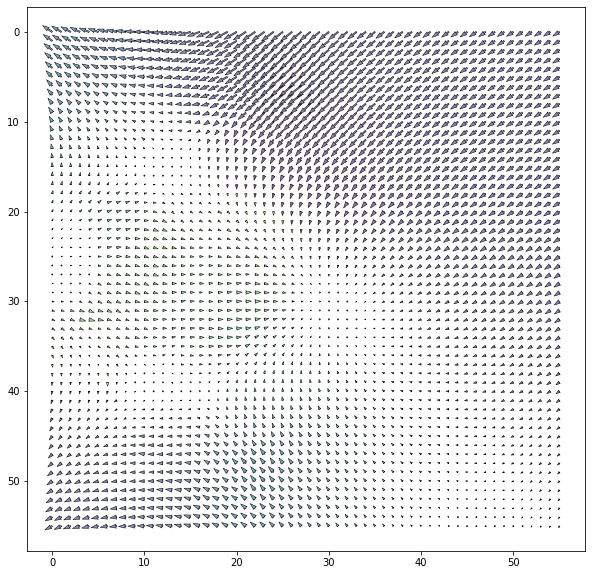

In [82]:
visualize_residuals(res)